### Learning fast.ai  Lesson 1 v2<br>
This notebook contains my personal notes for fast.ai Part 1 v2 Lesson 1.  In it you will find my lesson's learned, comments on what each line of code does, and especially, detail explanation of the following plotting functions written by Jeremy: rand_by_mask(), rand_by_correct(), plots(), plot_val_with_title(), most_by_mask(), and most_by_correct(). In the end, you will find an Appendix with some of the Numpy functions used in this notebook including links to their references pages.<br>
<br>
For more information on this lecture, please visit: http://forums.fast.ai/t/wiki-lesson-1/9398.<br>

In [1]:
# Put these at the top of every notebook, to get automatic reloading and inline plotting
%reload_ext autoreload
%autoreload 2
%matplotlib inline 
# Allow matplotlib to use inline.

In [2]:
from fastai.imports import * # Import all external libraries. 

In [3]:
from fastai.transforms import *
from fastai.conv_learner import *
from fastai.dataset import *
from fastai.model import *
from fastai.sgdr import *
from fastai.plots import *

In [4]:
PATH = 'data/dogscats/' # Path to the data.
sz = 224 # Size of the image, always square.  In this case, 224 x 224.

In [5]:
torch.cuda.is_available() # Find out if GPU is ready.

True

In [6]:
torch.backends.cudnn.enabled # Enable cudnn libary.

True

In [7]:
os.listdir(PATH) # List contents inside folder "dogscats".

['sample', 'models', 'train', 'valid', 'test1', 'tmp']

In [8]:
os.listdir(f'{PATH}train') # List content inside folder "train".

['cats', 'dogs']

In [9]:
os.listdir(f'{PATH}valid') # List content inside folder "valid".

['cats', 'dogs']

In [10]:
os.listdir(f'{PATH}valid/cats')[:10] # List first 10 files of folder "valid/cats".

['cat.3835.jpg',
 'cat.4499.jpg',
 'cat.1087.jpg',
 'cat.1749.jpg',
 'cat.4363.jpg',
 'cat.4761.jpg',
 'cat.2885.jpg',
 'cat.7787.jpg',
 'cat.6437.jpg',
 'cat.12332.jpg']

In [11]:
os.listdir(f'{PATH}test1')[:5] # List the first 5 files in folder "test1".

['4271.jpg', '11500.jpg', '6098.jpg', '6644.jpg', '11307.jpg']

In [12]:
files = os.listdir(f'{PATH}train/cats')[:5]; files # List the first 5 files in folder "cats"..
# files -> type list

['cat.9890.jpg', 'cat.861.jpg', 'cat.3286.jpg', 'cat.1964.jpg', 'cat.5902.jpg']

In [13]:
img = plt.imread(f'{PATH}train/cats/{files[0]}') 
# "imread()" reads the image into array.
# Read index 0 of variable "files"(type list) or "cat.9890.jpg". 
img[0] # Result nadarray.

array([[77, 81, 82],
       [78, 82, 83],
       [78, 82, 83],
       ..., 
       [80, 84, 83],
       [79, 83, 82],
       [78, 82, 81]], dtype=uint8)

In [14]:
img.shape # This tuple shows the shape of the "cat.9890.jpg", (255 x 266 size) x (3 RGB color) 

(255, 460, 3)

In [15]:
img[:2, :2, :2] # Tensor 3 array.

array([[[77, 81],
        [78, 82]],

       [[80, 84],
        [80, 84]]], dtype=uint8)

In [16]:
arch = resnet34 # The architecture used.

In [17]:
data = ImageClassifierData.from_paths(PATH, tfms=tfms_from_model(arch, sz)) # Data that we will use.
# "from_paths": accesses the data.
# There are 2 ways to access the data, "from_paths" and "from_csv".
# "tfms_from_model(arch, sz)" takes care of resizing, image cropping, initial normalization
#   (creating data with (mean,stdev) of (0,1)), and more.
# "PATH", points to the data.

In [18]:
learn = ConvLearner.pretrained(arch, data, precompute=True) 
# Use pretrained model from Resnet34
# precompute = True, to use trained model(Transfer Learning)

In [19]:
learn.fit(0.01, 5) # lr = 0.01, epoch = 2
# trn_loss = training loss
# val_loss = validation loss

A Jupyter Widget

epoch      trn_loss   val_loss   accuracy                      
    0      0.04893    0.028494   0.990234  
    1      0.03992    0.028218   0.989746                      
    2      0.043223   0.025713   0.990723                      
    3      0.037145   0.0297     0.989746                      
    4      0.032101   0.02744    0.989258                      



[0.027439781, 0.9892578125]

In [20]:
data.val_y # The labels stored for training. "0" = cats and "1" = dogs. 
# val_y class labels for validation data

array([0, 0, 0, ..., 1, 1, 1])

In [21]:
data.classes # How many classes are there in the data.

['cats', 'dogs']

In [22]:
# Predict validation set.
log_preds = learn.predict(is_test=False) 
# To predict the test set, set "is_test=True".

In [23]:
log_preds.shape 
# There are 1000 images in dogs and 1000 images in cats folder. Total of 2000 rows with 
#   2 indexes.

(2000, 2)

Alternatively you can use bash commands to find out the number of files in your folder. 
* %ls -1 | wc -l -> to find out the number of files in a given folder.
* If you use magic command in this notebook, make sure you access the right directory.  After you've verified, make sure you return to "dl1".

What is **log_preds**

In [24]:
# This gives prediction for validation set. 
# Predictions are in log scale probability.
# log_preds output two indexes per array, index 0 = probability of cats and 
#   index 1 = probabilility of dogs.
log_preds # type is ndarray 

array([[ -0.     , -12.56352],
       [ -0.00005,  -9.91287],
       [ -0.     , -13.02293],
       ..., 
       [ -9.47143,  -0.00008],
       [ -6.70855,  -0.00122],
       [ -5.19438,  -0.00556]], dtype=float32)

Why log scale? 
I think it is because it's easier to accomodate large numbers or numbers with many decimal places?  Anyway, Jeremy mentioned that Pytorch output is in log scale and to find its probability, we need to use np.exp() or e to the power of.  We will learn more about the reason later on in the course.

In [25]:
# Example: prints the first 5 predictions:
log_preds[0:5] 
# Each array contains 2 probabilities:
#   index = 0 is for cats and index = 1 is for dog.

array([[ -0.     , -12.56352],
       [ -0.00005,  -9.91287],
       [ -0.     , -13.02293],
       [ -0.00016,  -8.76188],
       [ -0.00006,  -9.65755]], dtype=float32)

In [26]:
# Example: print only columns with index 0, probability of being a cat.
log_preds[0:5, 0] 

array([-0.     , -0.00005, -0.     , -0.00016, -0.00006], dtype=float32)

In [27]:
# Example: print only columns with index 1, probability of being a dog.
log_preds[0:5, 1] 

array([-12.56352,  -9.91287, -13.02293,  -8.76188,  -9.65755], dtype=float32)

In [28]:
preds = np.argmax(log_preds, axis=1)  # from log probabilities to 0 or 1
probs = np.exp(log_preds[:,1]) # prob(dog)

 #### Functions that outputs the images

In [29]:
# def 1
def rand_by_mask(mask): return np.random.choice(np.where(mask)[0], 4, replace=False)

In [30]:
# def 2
def rand_by_correct(is_correct): return rand_by_mask((preds == data.val_y)==is_correct)

In [31]:
# def 3
def plots(ims, figsize=(12,6), rows=1, titles=None):
    f = plt.figure(figsize=figsize)
    for i in range(len(ims)):
        sp = f.add_subplot(rows, len(ims)//rows, i+1)
        sp.axis('Off')
        if titles is not None: sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i])      

In [32]:
# def 4
def plot_val_with_title(idxs, title):
    imgs = np.stack([data.val_ds[x][0] for x in idxs])
    title_probs = [probs[x] for x in idxs]
    print(title)
    return plots(data.val_ds.denorm(imgs), rows=1, titles=title_probs)

In [33]:
# def 5
def load_img_id(ds, idx): return np.array(PIL.Image.open(PATH+ds.fnames[idx]))

In [34]:
# def 6
def plot_val_with_title(idxs, title):
    imgs = [load_img_id(data.val_ds,x) for x in idxs]
    title_probs = [probs[x] for x in idxs]
    print(title)
    return plots(imgs, rows=1, titles=title_probs, figsize=(16,8))

In [35]:
# def 7
def most_by_mask(mask, mult):
    idxs = np.where(mask)[0]
    return idxs[np.argsort(mult * probs[idxs])[:4]]

In [36]:
# def 8
def most_by_correct(y, is_correct): 
    mult = -1 if (y==1)==is_correct else 1
    print(mult)
    return most_by_mask(((preds == data.val_y)==is_correct) & (data.val_y == y), mult)

Below I added a "print path" feature to "plots()" and "plot_val_with_title()" functions and renamed them as "plots_path()" and "plot_val_with_title_path()".  The new feature displays the file path of the image at the bottom of each picture.

In [37]:
# def 9
def plots_path(ims, figsize=(12,6), rows=1, titles=None, labels=None):
    f = plt.figure(figsize=figsize)
    for i in range(len(ims)):
        sp = f.add_subplot(rows, len(ims)//rows, i+1)
        sp.axis('Off')
        if titles is not None: 
            sp.set_title(titles[i], fontsize=10)
            sp.text(0, -0.1, 'path:' + labels[i] , fontsize=10, horizontalalignment='left',
                    verticalalignment='bottom', transform=sp.transAxes, color = 'black')
        plt.imshow(ims[i])

In [38]:
# def 10
def plot_val_with_title_path(idxs, title):
    imgs = np.stack([data.val_ds[x][0] for x in idxs])
    title_probs = [probs[x] for x in idxs]
    title_label = [data.val_ds.fnames[x] for x in idxs]
    print(title)
    return plots_path(data.val_ds.denorm(imgs), rows=1,
                      titles=title_probs, labels=title_label)

#### Review the code line by line

For references of the following numpy functions:<br>
* np.argmax()
* np.exp()
* np.where()
* np.random.choice()
* plt.figure()
* plt.add_subplot()
* plt.axis()
* plt.set_title()
* plt.imshow()
* np.stack()
* np.argsort()


Please see at the end of this notebook.

* **"preds" explained:**

In [39]:
preds = np.argmax(log_preds, axis=1)
# log_preds: validation predictions output in logs; type ndarray.
# np.argmax: returns the index with the highest value. 
# When axis = 0, it scans column by column, and when axis = 1, it scans row by row.

# Example:
preds_ = np.argmax(log_preds[996:1006], axis = 1); preds_
# Highest value for index 996 is 0 ((meaning probabilty of it being a cat is higher).
# Highest value for index 100 is 1 (meaning probabilty of it being a dog is higher).

array([0, 0, 0, 0, 1, 1, 1, 0, 1, 1])

* **"probs" explained**

In [40]:
probs = np.exp(log_preds[:,1])
# log_preds[:, 1]: index 0 -> cats, index 1 -> dogs 
# np.exp(): calculates e^x for each input of in_array or converts log to normal probability.

# Example:
probs_1 = np.exp(log_preds[0:3, 0]) # prints the first 3 normal probability of cats index.  
probs_2 = np.exp(log_preds[0:3, 1]) # prints the first 3 normal probability of dog index.
print(probs_1, probs_2)

[ 1.       0.99995  1.     ] [ 0.       0.00005  0.     ]


* **"np.where()" explained**

In [41]:
is_correct = True # or False
mask = ((preds == data.val_y)==is_correct)
np_where = np.where(mask)[0]
# np.where(): prints the index when a certain condition is satisfied. Where not 
#   satisfied, it will skip the index.
# np.where(mask)[0]: try type(np.where(mask)) and type(np.where(mask)[0]), see the difference.

# Example:
mask_1 = ((preds[1185:1190] == data.val_y[1185:1190]))
np.where(mask_1)[0] # preds 1187 != data.val_y 1187. 

array([0, 1, 2, 3])

In [42]:
# Example:
mask_1 = ((preds[1185:1190] == data.val_y[1185:1190])==False) # Try True.
np.where(mask_1)[0]

array([4])

* **"np.random.choice()" explained**

In [43]:
np.random.choice(np.where(mask)[0], 4, replace=False)
# mask: we know what is mask already.
# np.random.choice(), parameter 2, will output 4 numbers from the first parameter condition.
# np.random.choice() parameter 3, replace, when False, it will not output 2 equal numbers, vice-versa. 

array([1627,  973,  377,  662])

##### def 1:
def **rand_by_mask(mask)**: return np.random.choice(np.where(mask)[0], 4, replace=False)<br>
##### def 2:
def **rand_by_correct(is_correct)**: return rand_by_mask((preds == data.val_y)==is_correct)

_Summary_:
* "preds": takes the output of log_preds and converts them to index 0 for cats and index 1 for dogs.
* "probs"  takes the output of log_preds and converts them to normal probabilities.
* "data.val_y": validation set data for cats and dogs.
* "rand_by_mask(mask)** compare preds vs data.val_y and finds only indexes that matches. It then prints 4 of those indexes in random without repeating any of the numbers.
* "rand_by_correct(True)" returns only those outputs that are True from "rand_by_mask()".

**plt.figure() explained**:

In [44]:
figsize = (12, 6)
f = plt.figure(figsize=figsize)
# plt.figure(): creates a figure with height 12 and width 6.

**f.add_subplot() explained:**

In [45]:
rows = 1
idxs = rand_by_correct(True) # or False
imgs = np.stack([data.val_ds[x][0] for x in idxs]) # see below for explanation.
ims = data.val_ds.denorm(imgs) # denormalization of the images.
i = 1 # from len(ims) = 4
sp = f.add_subplot(rows, len(ims)//rows, i+1)
# add_subplot(): Return a subplot axes at the given grid position.
# parameter 1: rows = 1; 
# parameter 2: len(ims)//1 = 4
# parameter 1 and 2 -> grid 1x4
# parameter 3: 1 -> first subplot, we have total of 4

**sp.axis("Off") explained:**

In [46]:
off = sp.axis('Off') 
# Turn axis Off, you can turn it On as well.

**if titles is not None: sp.set_title(titles[i], fontsize=16) explained**:

In [47]:
title_probs = [probs[x] for x in idxs]
titles = title_probs
if titles is not None: sp.set_title(titles[i], fontsize=16)
# set_title(titles[i], fontsize=16): print the probabilities on top of the images as title. 

**plt.imshow(ims[i]) explained:**

In [48]:
# plt.imshow(): renders the image generated by numpy array.  

##### def 3:<br> 
def plots(ims, figsize=(12,6), rows=1, titles=None):<br>
> f = plt.figure(figsize=figsize)<br>
  for i in range(len(ims)):<br>
>> sp = f.add_subplot(rows, len(ims)//rows, i+1)<br>
   sp.axis('Off')<br>
   if titles is not None: sp.set_title(titles[i], fontsize=16)<br>
   
> plt.imshow(ims[i]) <br>

_Summary_:
* It answers, what to plot? Plots 4 images in a specific figsize with axis off and probabilities for each image.

**data.val_ds.denorm() skip:**
I will not explained data normalization and denormalization.  It will be left to future tutorials.

**imgs = np.stack([data.val_ds[x][0] for x in idxs]) explained:**

In [49]:
# data.val_ds: validation datsets
# Uncomments the below one by one and see the output:
# data.val_ds[0][0] # the first image
# data.val_ds[0][1] # prints 0(cats)
# data.val_ds[0][2] # error, out of range
# data.val_ds[1999][0] # the last image
# data.val_ds[1999][1] # prints 1(dogs)

**title_probs = [probs[x] for x in idxs] explained:**

In [50]:
title_probs = [probs[x] for x in idxs]
# Set a title in the current axes
# titles=title_probs
# title_probs = [probs[x] for x in idxs] -> probability value
# When title[0] = probability of first image being a cats or dogs.
# Find the probabilities of each image(total of 4)
for x in idxs:
    print([probs[x]])
    print(data.val_ds.fnames[x])

[0.99996376]
valid/dogs/dog.4525.jpg
[0.99999237]
valid/dogs/dog.949.jpg
[0.9999249]
valid/dogs/dog.1404.jpg
[0.99999237]
valid/dogs/dog.3150.jpg


In [51]:
imgs = np.stack([data.val_ds[x][0] for x in idxs])
# joins a sequence of arrays in a new axis

##### def 4:
def plot_val_with_title(idxs, title):
> imgs = np.stack([data.val_ds[x][0] for x in idxs])<br>
  title_probs = [probs[x] for x in idxs]<br>
  print(title)<br>
  return plots(data.val_ds.denorm(imgs), rows=1, titles=title_probs)
  
_Summary_:
* It anwers how to plot? Join the images in sequences in a new axis.
* Use the probabilities found in "probs". 

##### def 5
def load_img_id(ds, idx): return np.array(PIL.Image.open(PATH+ds.fnames[idx]))

##### def 6
def plot_val_with_title(idxs, title):
>    imgs = [load_img_id(data.val_ds,x) for x in idxs]
     title_probs = [probs[x] for x in idxs]
     print(title)
     return plots(imgs, rows=1, titles=title_probs, figsize=(16,8))
     
I will not go through def 5 and 6, my version(def 9 and 10) that prints out the id for each picture should do the same thing, I think.  

***Let' make some trials***

Correctly classified


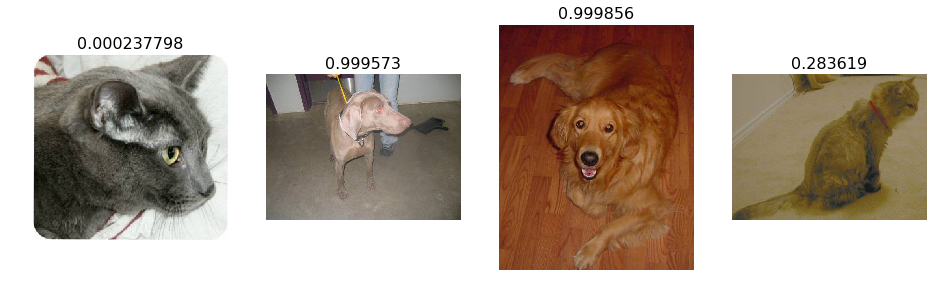

In [52]:
plot_val_with_title(rand_by_correct(True), "Correctly classified")

Incorrectly classified


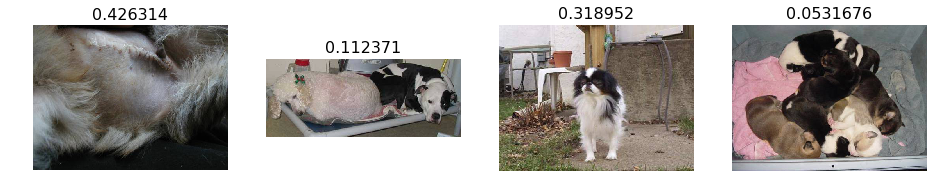

In [53]:
plot_val_with_title(rand_by_correct(False), "Incorrectly classified")

Using def 9 and 10, which is the same as def 3 and 4, but def 9 and 10 prints the path to the image and its id.<br>
I used data.val_ds.fnames[ ] to find the paths.

In [54]:
data.val_ds.fnames[3] # type list

'valid/cats/cat.1749.jpg'

Correctly classified


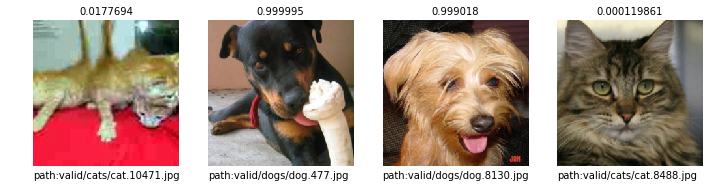

In [55]:
plot_val_with_title_path(rand_by_correct(True), "Correctly classified")

Incorrectly classified


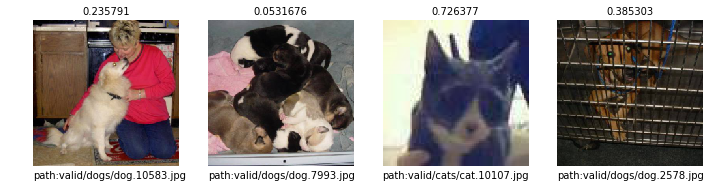

In [56]:
plot_val_with_title_path(rand_by_correct(False), "Incorrectly classified")

Next I explain def 7 and 8.

**np.argsort() explained:**

In [57]:
# We know already what this is, print all predictions after comparing preds vs data.val_y
((preds == data.val_y))

# Example
is_correct = True
known = np.where((preds[1185:1190] == data.val_y[1185:1190])==True)
print(known) # print only True indexes.

(array([0, 1, 2, 3]),)


In [58]:
# When y = 0, output an array with all cats labels.
# When y = 1, output an array with all dogs labels.
# (data.val_y == y)

# Example:
y = 1
np.where(data.val_y[1185:1190] == y)

(array([0, 1, 2, 3, 4]),)

In [59]:
# Combine the previous 2 examples:
# It must satisfy both conditions:
y = 1 # dogs
is_correct = True # Correct predictions

known_3 = np.where(((preds[1185:1190] == data.val_y[1185:1190])==is_correct) & (data.val_y[1185:1190] == y))[0]

# print only True(correct) indexes and dogs label only.
print(known_3)


[0 1 2 3]


In [60]:
idxs_1 = np.where(((preds == data.val_y)==is_correct) & (data.val_y == y))[0]

In [61]:
# What is probs[idxs_1], example:
known_3 = np.where(((preds[1185:1190] == data.val_y[1185:1190])==is_correct) & (data.val_y[1185:1190] == y))[0]
probs[known_3] # Correct guesses that the preds were dogs and its probabilities.

array([ 0.     ,  0.00005,  0.     ,  0.00016], dtype=float32)

In [62]:
# When 
mult = -1
y = 1
is_correct = True
np.argsort(1 * probs[known_3])[:4]
# index 2 is biggest value
# index 3 the second biggest value
# index 1 the third biggest value
# index 0 the smallest value

array([2, 0, 1, 3])

**mult = -1 if (y==1)==is_correct explained:**

In [63]:
y = 0
is_correct = False
mult = -1 if (y==1)==is_correct else 1 # y == 1 is False, then mult = -1
# y == 1 is False, because 
print(mult)
# y == 1 == False -> true, because y == 0 and not == 1, so -1.

-1


In [64]:
y = 0
is_correct = True
mult = -1 if (y==1)==is_correct else 1 # y == 1 is True
print(mult)
# y == 1 == True -> not true, because y == 0, therefore, not == 1, so else 1.

1


In [65]:
y = 1
is_correct = False
mult = -1 if (y==1)==is_correct else 1
print(mult)
# y == 1 == False -> not true, so else 1

1


In [66]:
y = 1
is_correct = True
mult = -1 if (y==1)==is_correct else 1
print(mult)
# y == 1 == True -> correct, so -1

-1


##### def 7
def most_by_mask(mask, mult):
>    idxs_1 = np.where(mask)[0] # renamed to idxs_1.<br>
    return idxs[np.argsort(mult * probs[idxs_1])[:4]]<br>
##### def 8
def most_by_correct(y, is_correct): 
>    mult = -1 if (y==1)==is_correct else 1<br>
    print(mult)<br>
    return most_by_mask(((preds == data.val_y)==is_correct) & (data.val_y == y), mult)<br>
   
_Summary_:
* Using np.argsort() to find out the indexes with the highest value.

-1
Most correct dogs


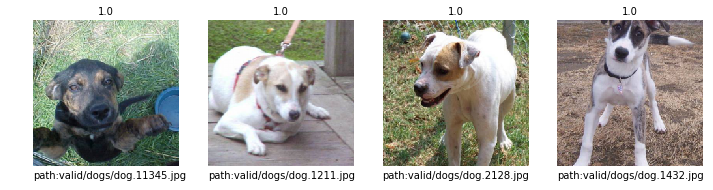

In [67]:
plot_val_with_title_path(most_by_correct(1, True), "Most correct dogs")

1
Most incorrect dogs


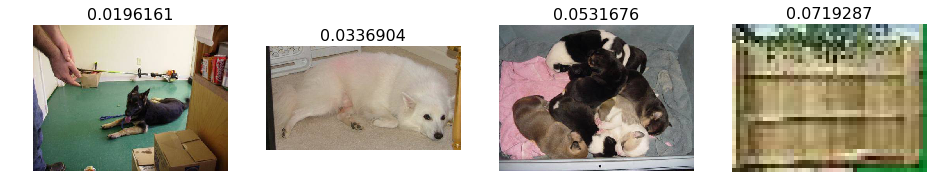

In [68]:
plot_val_with_title(most_by_correct(1, False), "Most incorrect dogs")

-1
Most correct cats


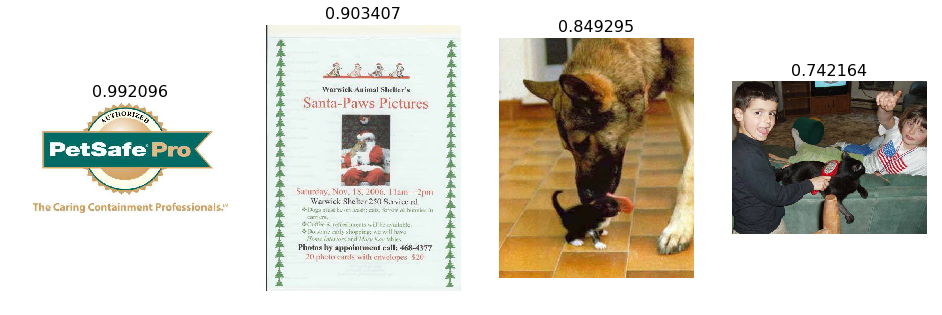

In [69]:
plot_val_with_title(most_by_correct(0, False), "Most correct cats")

1
Most correct cats


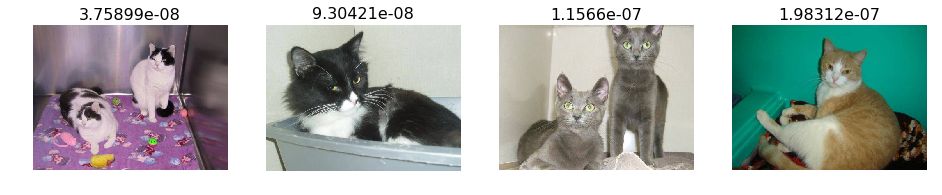

In [70]:
plot_val_with_title(most_by_correct(0, True), "Most correct cats")

Most uncertain predictions


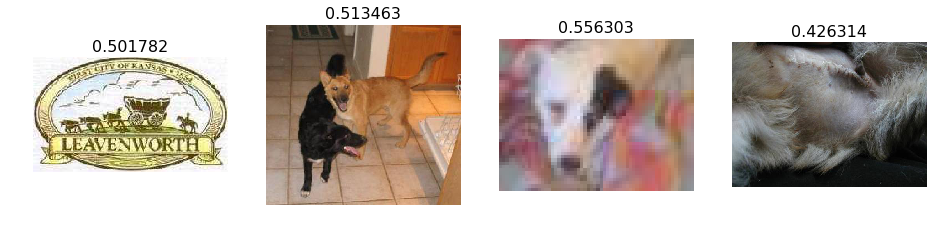

In [71]:
# Finally to find the most uncertain, that is, those close to 50% of probability:
most_uncertain = np.argsort(np.abs(probs -0.5))[:4]
plot_val_with_title(most_uncertain, "Most uncertain predictions")

#### Lesson's Learned

1) It is insufficient for learning by just reading the codes.  To really learn, one must rewrite each line of code and comments what they do.  .<br> 
2) Essential maths that we need to know: logarithms and exponents. Like Jeremy mentioned, "they are all over the place".<br>
3) Essential libraries(must be familiar with): numpy and matplotlib.  Numpy is very similar to Pytorch, the major difference is, Pytorch is made to run on GPU.  So, the more you know about Numpy, the more you know about Pytorch.  Matplotlib, on the other hand, is the only library that reads and plots arrays that I am aware of.  Even though, it is hard to learn, but I think it is worth the investment. <br>
4) Find out first what is the container type of the output(i.e. tuple, list, dictionary).  Then dig deeeper.  For example, if the output is a tuple, check what's inside of the tuple.  In  some cases, a tuple contains another container, a list.  Then, find out the data type contained within the container.     

#### Appendix

What is **np.argmax**

In [72]:
preds_A = np.argmax(log_preds, axis = 1); preds_A[0:5]

array([0, 0, 0, 0, 0])

In [73]:
# Example: 
a = np.arange(6);a

array([0, 1, 2, 3, 4, 5])

In [74]:
np.argmax(a) 
# It answers the question: the biggest value, where it is located? At which index? 
# Tryout np.argmin().

5

In [75]:
a.reshape(3, 2)

array([[0, 1],
       [2, 3],
       [4, 5]])

In [76]:
np.argmin(a) # lowest value found at index 0.

0

In [77]:
# Example:
b = np.array([[1,2,4,7], [9,88,6,45], [9,100,3,4]]);
b

array([[  1,   2,   4,   7],
       [  9,  88,   6,  45],
       [  9, 100,   3,   4]])

In [78]:
np.argmax(b) 
# The index with the biggest value is index 9.
# Example:
# Adding axis = 0, will check the column.
np.argmax(b, axis=0)
#([[  1,   2,   4,   7],   
#  [  9,  88,   6,  45],   
#  [  9, 100,   3,   4]])  
# largest number:
# Column 1, index 1 -> when same value repeats, numpy consider only the first one.
# Column 2, index 2.
# Column 3, index 1.
# Column 4, index 1.
# Adding axis = 1, will check the rows.

array([1, 2, 1, 1])

In [79]:
np.argmax(b, axis=1)
# For detail explanation see:
# https://stackoverflow.com/questions/28697993/numpy-what-is-the-logic-of-the-argmin-and-argmax-functions

array([3, 1, 1])

In [80]:
# Summary:
preds_ = np.argmax(log_preds, axis = 1)
# It finds the index of the largest value in the array.  
# The largest value maybe located at index 0 or 1.
# axix = 1,tells it to look row by row.
# Variable preds will be used to compare with data.val_y later on.

What is **np.exp()**

In [81]:
# What is np.exp() in numpy? 
probs = np.exp(log_preds[:,1]) # pr(dog) 

In [82]:
# Example:
probs_ = np.exp(log_preds[0:10, 0]); probs # index 0 for cats.
probs_ = np.exp(log_preds[0:10, 1]); probs # index 1 for dogs.

array([ 0.     ,  0.00005,  0.     , ...,  0.99992,  0.99878,  0.99445], dtype=float32)

**np.exp()** calculates e^x for each input of in_array.  e = constant 2.718281<br>

log_preds returns log probabilities.  To convert them to simple probabilities, that is, make the result between 0 and 1, we use np.exp() function.

Probably, this is related to softmax.  We will find out that later!
https://stackoverflow.com/questions/48465737/how-to-convert-log-probability-into-simple-probability-between-0-and-1-values-us

What is ***np.where(mask)[0]*** <br>
If we fill parameter mask with (preds == data.val_y)[0], it will return an array with values 0 or 1.<br>  0 for when the cats has higher value than dogs and vice-versa.

In [83]:
# Example:
np.where((preds[990:1010]==data.val_y[990:1010]))
# Only indexes that satisfied the condition(returned True) will be printed out.   
# Index 18 were False, it did not satisfy the condition, indexes did not return.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 14, 15, 16, 17, 19]),)

In [84]:
# Note that np.where() returns ndarray or a tuple of ndarray.
c = np.where(preds[990:1010]==data.val_y[990:1010]) 
type(c) # tuple of ndarray ([some values])

tuple

In [85]:
# To find out what's inside of the tuple, we call the first index [0].
c_array = np.where(preds[990:1010]==data.val_y[990:1010])[0] # Try using 1 instead of 0.
c_array # We found an array inside the tuple.

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 14, 15, 16, 17, 19])

In [86]:
For more example of np.where():<br>
https://stackoverflow.com/questions/34667282/numpy-where-detailed-step-by-step-explanation-examples/34667386

SyntaxError: invalid syntax (<ipython-input-86-2d1817b6b503>, line 1)

Next, we look at ***np.random.choice(np.where(mask)[0], 4, replace=False)***

In [87]:
# Example
np.random.choice(5, 3)
# First parameter, indicates the range of choices.
# Second parameter, indicates the q'ty of values to be displayed.

array([3, 3, 3])

In [88]:
# Example
np.random.choice(5, 3, replace=False)
# When replace = False, numbers will not repeat.

array([0, 2, 4])

In [89]:
# Example
np.random.choice(5, 3, replace=True) 
# Numbers will repeat. Try it to execute many times!

array([3, 0, 0])

In [90]:
rand_by_mask((preds == data.val_y)) # Returns 4 images

array([1097, 1930, 1086,   39])

***np.random.choice(np.where(mask)[0], 4, replace=False)***<br>
It will randomly choose 4 indexes of preds == data.val_y, those that turned out to be True or correct.  Those 4 indexes cannot be the same indexes(replace=False).<br>
For more information on np.random.choice() see:<br>
https://docs.scipy.org/doc/numpy-1.14.0/reference/generated/numpy.random.choice.html

What is **np.stack**

We start with **np.stack([data.val_ds[x][0] for x in idxs])**

* val_ds = validation dataset

* Data types of "data.val_ds":<br>

    * d = data.val_ds[0] -> Tuple with ndarray.<br>
    type(d) tuple with 3 dimensional ndarray.

    * d = data.val_ds[0][0] -> ndarray, index 0.<br>
    type(d) numpy.ndarray

    * d = data.val_ds[0][1] -> ndarray, index 1 (values 0 or 1)<br>
    type(d) numpy.int64

    * file = data.val_ds.fnames[0:10]; file # Print file name <br>
    type(file) # type lista.val_ds[x][0] for x in idxs])** <br>

    * file = data.val_ds.fnames[0:10] -> fnames = file names <br>
    type(file) # type list

* np.stack() -> join a sequence of array in a new axis<br>

What is **add_subplot(rows, len(ims)//rows, i + 1)**

Text(0.5,0.5,'matplotlib')

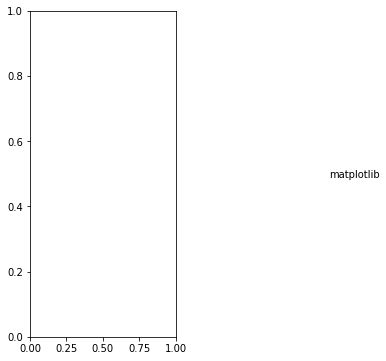

In [91]:
# i =  0, 1, 2, 3
# for i in range(len(ims)):
f = plt.figure(figsize = (12, 6))
(f.add_subplot(1,4,1)).axis("On") # axis "Off" will make the borders disappear
# parameter 1: rows = 1; parameter 2: len(ims)//1 = 4 -> grid 1x4
# parameter 3: 1 -> first subplot, we have total of 4
f.text(0.5, 0.5, 'matplotlib', horizontalalignment='center', verticalalignment='center')
# Vertical alignment must be one of ('top', 'bottom', 'center', 'baseline')
# Horizontal alignment must be one of ('center', 'right', 'left')

Find more about add_suplot() in:<br>
https://stackoverflow.com/questions/3584805/in-matplotlib-what-does-the-argument-mean-in-fig-add-subplot111

For information on np.argsort():
https://stackoverflow.com/questions/17901218/numpy-argsort-what-is-it-doing

#### End